In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import time as t
import plotly.graph_objects as go
sns.set()


In [2]:
bnb= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\tp2\Proyecto2_Data_Analytics\ETL\bnb.csv')

In [3]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECHAS          1327 non-null   object 
 1   PRECIO-usd      1327 non-null   float64
 2   MARKET_CAP-usd  1327 non-null   float64
 3   TOTAL_VOLUMES   1327 non-null   float64
 4   COIN_ID         1327 non-null   object 
dtypes: float64(3), object(2)
memory usage: 52.0+ KB


In [4]:
bnb.describe()

,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES
count,1327.000000,1.327000e+03,1.327000e+03
mean,249.350114,3.999175e+10,1.382912e+09
std,174.039387,2.846131e+10,1.783184e+09
min,9.400671,1.431388e+09,1.776448e+07
25%,30.334558,4.484920e+09,3.791211e+08
50%,278.867987,4.473395e+10,8.045667e+08
75%,351.855825,5.489405e+10,1.683519e+09
max,675.098974,1.104412e+11,2.210352e+10


In [5]:
bnb['FECHAS']=pd.to_datetime(bnb['FECHAS'])

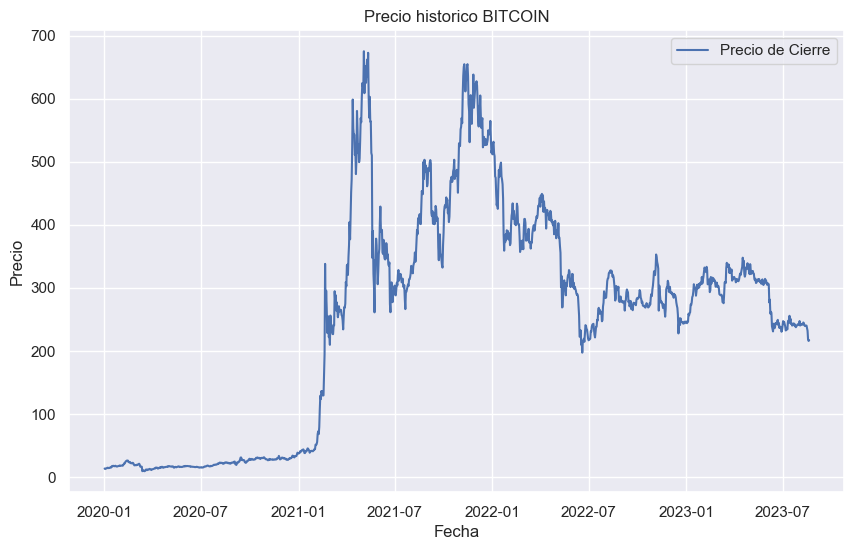

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(bnb['FECHAS'], bnb['PRECIO-usd'], label='Precio de Cierre')
plt.title('Precio historico BITCOIN')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

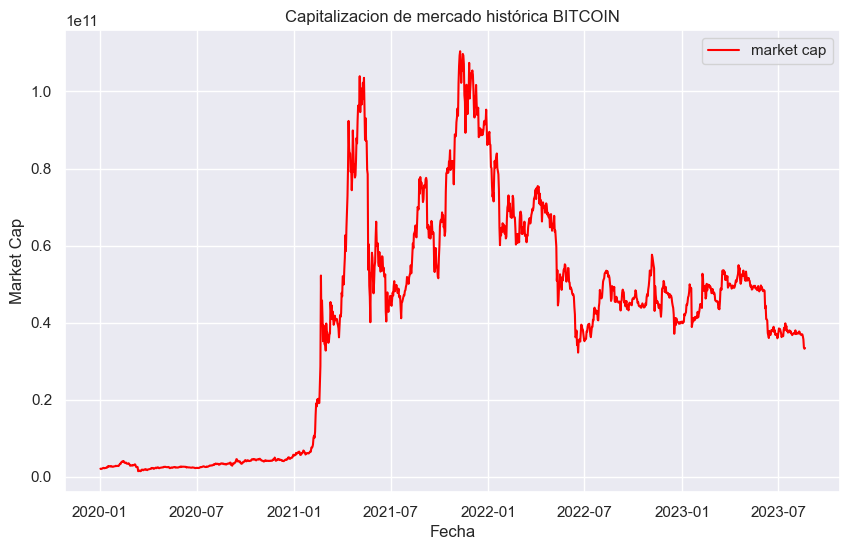

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(bnb['FECHAS'], bnb['MARKET_CAP-usd'], label='market cap', color='red')
plt.title('Capitalizacion de mercado histórica BITCOIN')
plt.xlabel('Fecha')
plt.ylabel('Market Cap')
plt.legend()
plt.grid(True)
plt.show()

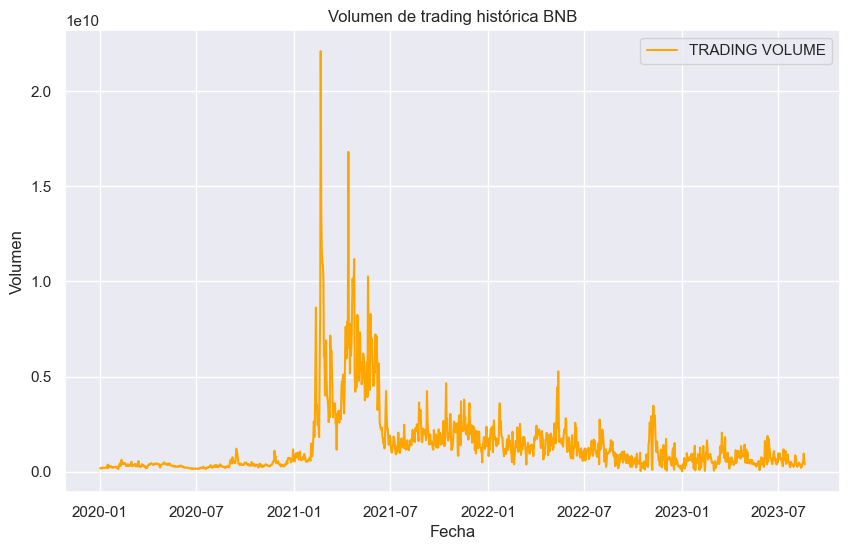

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(bnb['FECHAS'], bnb['TOTAL_VOLUMES'], label='TRADING VOLUME', color='orange')
plt.title('Volumen de trading histórica BNB')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
from ta.momentum import RSIIndicator

# Calcular RSI
rsi_period = 14  # Período típico para RSI
indicator = RSIIndicator(bnb['PRECIO-usd'], window=rsi_period)
bnb['RSI'] = indicator.rsi()

bnb.tail()

,FECHAS,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES,COIN_ID,RSI
1322,2023-08-16,236.607285,3.644085e+10,4.801982e+08,binancecoin,40.691369
1323,2023-08-17,232.095486,3.568297e+10,5.180758e+08,binancecoin,34.958068
1324,2023-08-18,217.795538,3.355258e+10,9.462674e+08,binancecoin,23.605660
1325,2023-08-19,215.972916,3.322978e+10,6.146381e+08,binancecoin,22.598348
1326,2023-08-20,217.075522,3.340955e+10,3.853982e+08,binancecoin,24.691967


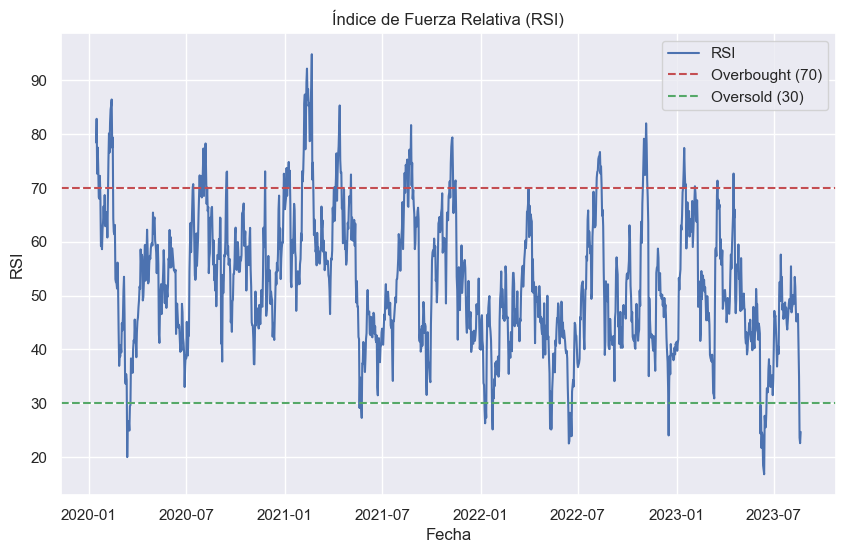

In [12]:
import matplotlib.pyplot as plt

# Graficar el RSI
plt.figure(figsize=(10, 6))
plt.plot(bnb['FECHAS'], bnb['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Índice de Fuerza Relativa (RSI)')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
rolling_window = 50
bnb['MovingAverage'] = bnb['PRECIO-usd'].rolling(window=rolling_window).mean()

print(bnb.head())

      FECHAS  PRECIO-usd  MARKET_CAP-usd  TOTAL_VOLUMES      COIN_ID  RSI  \
0 2020-01-02   13.685902    2.099316e+09   1.847091e+08  binancecoin  NaN   
1 2020-01-03   13.007171    1.995648e+09   1.573566e+08  binancecoin  NaN   
2 2020-01-04   13.603276    2.088117e+09   1.772397e+08  binancecoin  NaN   
3 2020-01-05   13.794575    2.116144e+09   1.699075e+08  binancecoin  NaN   
4 2020-01-06   14.006361    2.147451e+09   1.834075e+08  binancecoin  NaN   

   MovingAverage  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


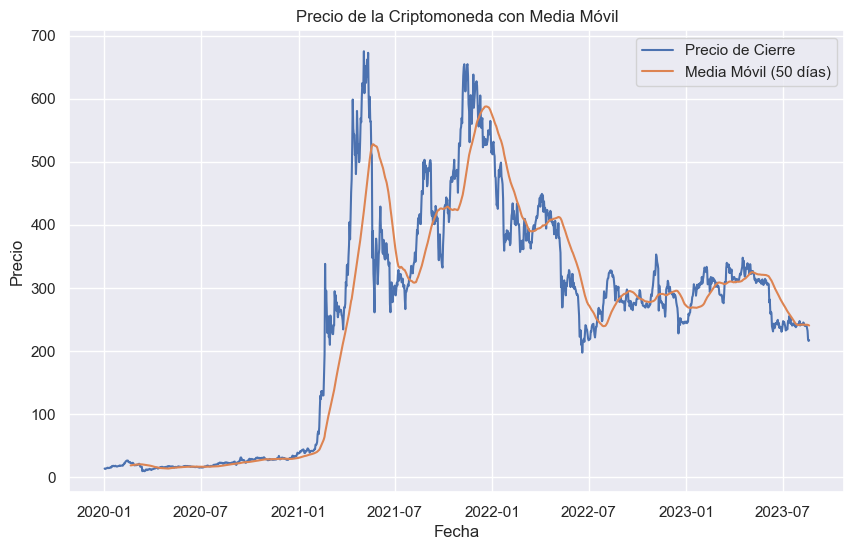

In [15]:
# Graficar los datos y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(bnb['FECHAS'], bnb['PRECIO-usd'], label='Precio de Cierre')
plt.plot(bnb['FECHAS'], bnb['MovingAverage'], label=f'Media Móvil ({rolling_window} días)')
plt.title('Precio de la Criptomoneda con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()